***Simple beginner project for traffic sign classification using transfer learning.***

1. Importing all packages

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pathlib
import glob
import os

from tensorflow.keras.layers import Dense , Flatten , Dropout , Conv2D , MaxPooling2D
from tensorflow.keras.models import Model , Sequential
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.callbacks import EarlyStopping

1. analysing and visualising our data

In [2]:
#path to the csv file containing all labels for traffic signs since folder contains numbers instead of class names
path = 'C:/Users/rohit/Documents/__ml__/traffic_sign/Traffic sign classification/dataset/labels.csv'
df = pd.read_csv(path)

In [3]:
df

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)
5,5,Speed limit (60km/h)
6,6,Speed limit (70km/h)
7,7,speed limit (80km/h)
8,8,Dont Go straight or left
9,9,Dont Go straight or Right


In [4]:
#path to the folder containing our dataset
dataset = r'C:/Users/rohit/Documents/__ml__/traffic_sign/Traffic sign classification/dataset/traffic_Data/DATA'

In [5]:
data = []
entry = []
for filename in os.listdir(dataset):
    entry.append(df['Name'][int(filename)])
    entry.append(int(filename))
    data.append(entry[:2])
    entry.clear()

#making a dataframe so it's easier to display using seaborn
display_data = pd.DataFrame(data,columns=['Name' , 'num_images'])
#display_data

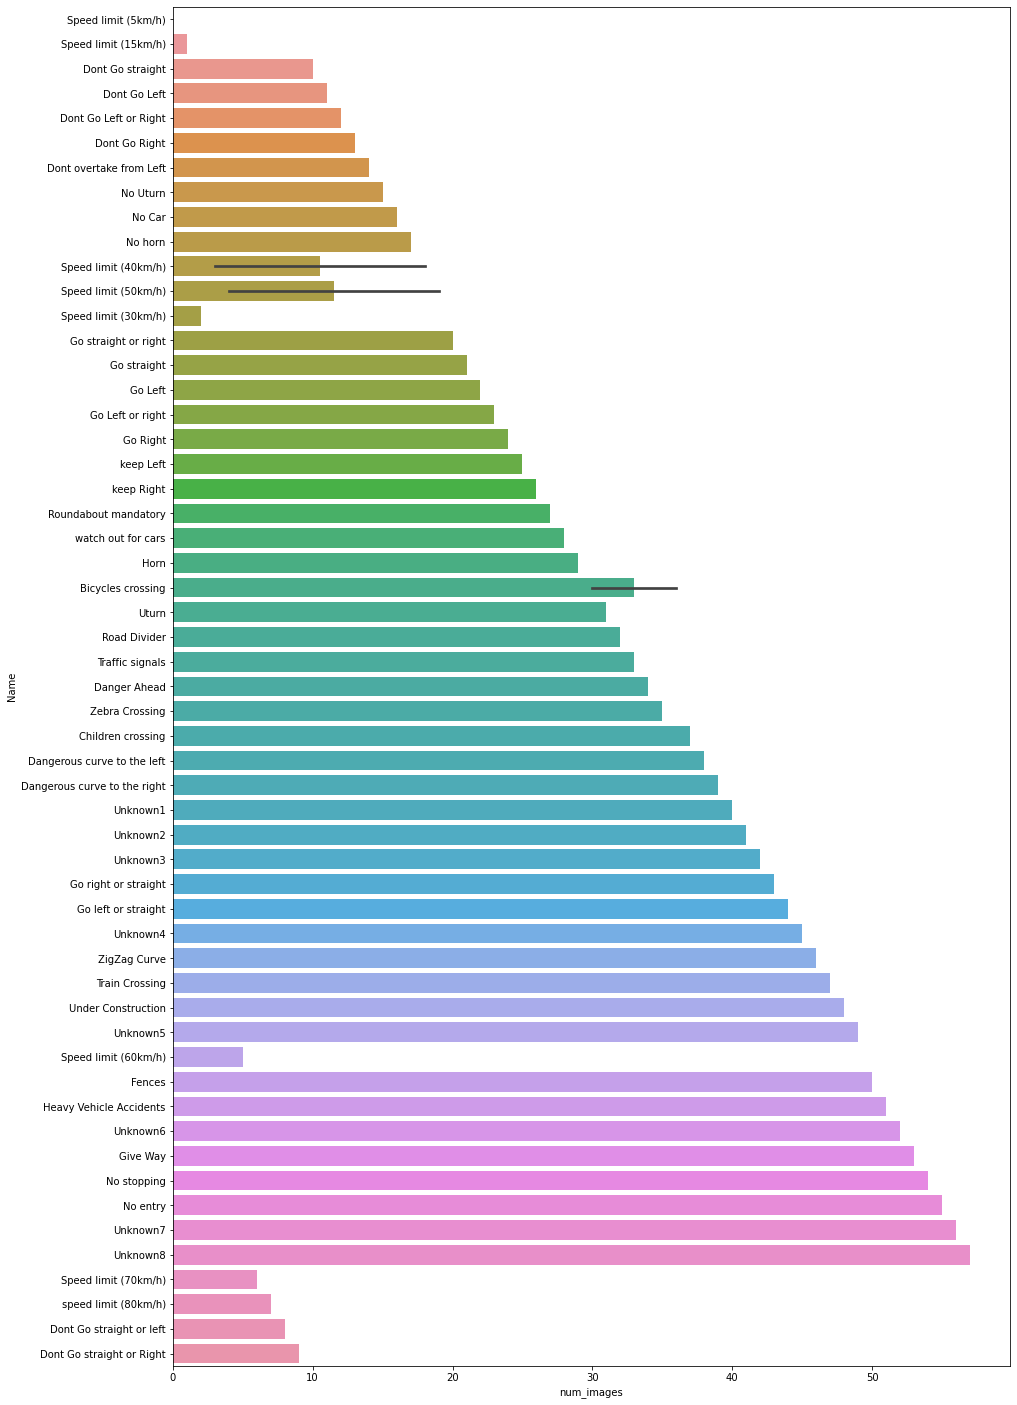

In [6]:
plt.figure(figsize=(15,25))
ax = sns.barplot(x='num_images',y='Name' , data=display_data)

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset,validation_split=0.2,
                                                    subset='training',
                                                    image_size=(224,224),
                                                    seed=123,
                                                    batch_size=32)

Found 4170 files belonging to 58 classes.
Using 3336 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset,validation_split=0.2,
                                                    subset='validation',
                                                    image_size=(224,224),
                                                    seed=123,
                                                    batch_size=32)

Found 4170 files belonging to 58 classes.
Using 834 files for validation.


In [9]:
class_numbers = train_ds.class_names
class_names = []
for i in class_numbers:
    class_names.append(df['Name'][int(i)])

#class_names

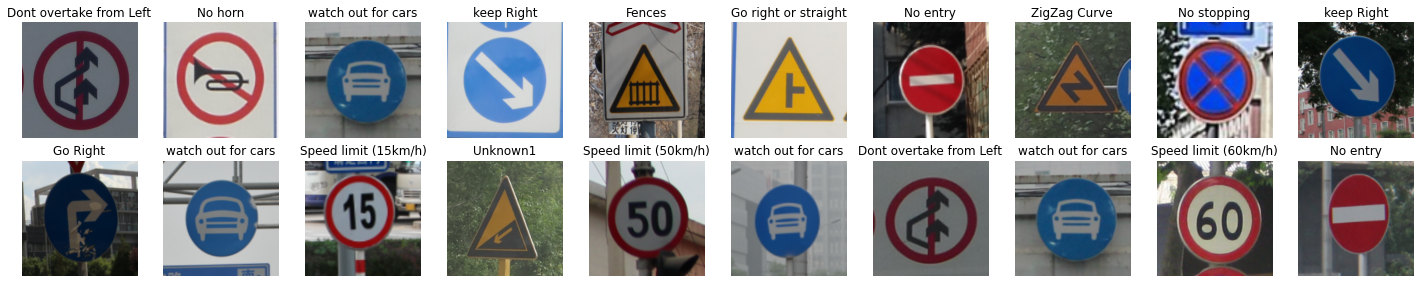

In [10]:
plt.figure(figsize=(25, 25))
for images, labels in train_ds.take(1):
    for i in range(20):
        ax = plt.subplot(10, 10, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

plt.show()

In [11]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(224,224,3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
   tf.keras.layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical")
  ]
)

In [12]:
model = Sequential()
model.add(data_augmentation)
model.add(Rescaling(1./255))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128 ,(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128 , activation = 'relu'))
model.add(Dense(len(df) , activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 224, 224, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)       

In [13]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='adam' , metrics=['accuracy'])

In [14]:
# Set callback functions to early stop training 
mycallbacks = [EarlyStopping(monitor='val_loss', patience=5)]
hist = model.fit(train_ds,validation_data=val_ds, epochs=50 , callbacks=mycallbacks )

Epoch 1/50
105/105 [==============================] - 21s 118ms/step - loss: 3.5528 - accuracy: 0.1193 - val_loss: 2.8490 - val_accuracy: 0.2386
Epoch 2/50
105/105 [==============================] - 10s 97ms/step - loss: 2.4829 - accuracy: 0.2983 - val_loss: 1.9735 - val_accuracy: 0.3861
Epoch 3/50
105/105 [==============================] - 10s 97ms/step - loss: 1.9778 - accuracy: 0.3819 - val_loss: 1.6303 - val_accuracy: 0.4664
Epoch 4/50
105/105 [==============================] - 10s 97ms/step - loss: 1.7554 - accuracy: 0.4469 - val_loss: 1.5307 - val_accuracy: 0.5528
Epoch 5/50
105/105 [==============================] - 10s 96ms/step - loss: 1.5818 - accuracy: 0.4871 - val_loss: 1.3796 - val_accuracy: 0.5659
Epoch 6/50
105/105 [==============================] - 11s 101ms/step - loss: 1.5007 - accuracy: 0.5174 - val_loss: 1.3761 - val_accuracy: 0.5528
Epoch 7/50
105/105 [==============================] - 11s 104ms/step - loss: 1.4129 - accuracy: 0.5387 - val_loss: 1.1245 - val_accura

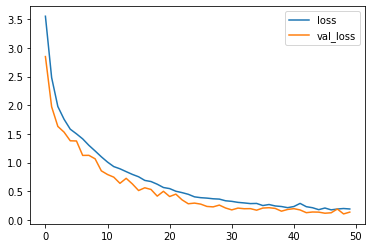

In [15]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')

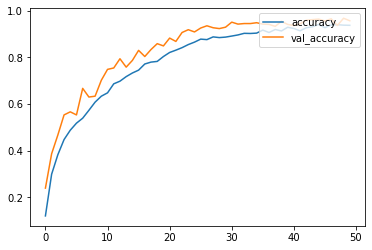

In [16]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')

In [17]:
os.mkdir('model')
tf.keras.models.save_model(model, 'model')

INFO:tensorflow:Assets written to: model\assets
